<a href="https://colab.research.google.com/github/Juliaan20/Juliaan20/blob/main/Students_Performance_Data_Repaso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

df = pd.read_csv("/content/StudentsPerformance.csv")
print(df)


     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [8]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
#numero de filas y columnas
df.shape

(1000, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# datos genero
df['gender']

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [13]:
df['math score']

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [14]:
# Resumen estadístico del dataset
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [15]:
valores_nulos = df.isnull().any()
print("Valoes nulos: ")
print(valores_nulos[valores_nulos == False])
print(valores_nulos[valores_nulos == True])

Valoes nulos: 
gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool
Series([], dtype: bool)


# Limpieza de datos

In [16]:
#sacar los datos categoricos:
cat = [var for var in df.columns if df[var].dtype == 'object']
print('Variables categoricas: \n\n',cat)

Variables categoricas: 

 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [17]:
#sacar los datos numericos:
num = [var for var in df.columns if df[var].dtype != 'object']
print('Variables numericas:\n\n',num)

Variables numericas:

 ['math score', 'reading score', 'writing score']


In [18]:
#identificamos los datos duplicados:
duplicados = df.duplicated().any()

#imprimimos en pantalla:
if duplicados:
    print("Existen valores duplicados")
else:
    print("No existen valores duplicados")


No existen valores duplicados


In [19]:
# Encontrar los valores erróneos en la columna puntaje de matemáticas:
valores_erroneos = df.columns[df.dtypes.apply(lambda x:x not in [int, float])]

# Muestra los valores erróneos
print("Valores erroneos: ",valores_erroneos)

Valores erroneos:  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [20]:
valores_erroneos = df[df['math score']==0]
cantidad = len (valores_erroneos)
print("Hay", str(cantidad), "dato erróneo")
#Si el resultado solo es 1 significa que solo hay un valor erróneo en la columna "math score" que es igual a cero.

Hay 1 dato erróneo


In [21]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


<ipython-input-21-14a66ac5b974>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [22]:
# Valor máximo
valor_maximo1 = df['math score'].max()
valor_maximo2 = df['reading score'].max()
valor_maximo3 = df['writing score'].max()

# Valor mínimo
valor_minimo1 = df['math score'].min()
valor_minimo2 = df['reading score'].min()
valor_minimo3 = df['writing score'].min()

# Imprime los valores máximos y mínimos
print("Valores máximos:")
print(" - Puntaje Máximo en matemáticas:", valor_maximo1)
print(" - Puntaje Máximo en lectura:", valor_maximo2)
print(" - Puntaje Máximo en escritura:", valor_maximo3)
print("\nValores mínimos:")
print(" - Puntaje Mínimo en matemáticas:", valor_minimo1)
print(" - Puntaje Mínimo en lectura:", valor_minimo2)
print(" - Puntaje Mínimo en escritura:", valor_minimo3)


Valores máximos:
 - Puntaje Máximo en matemáticas: 100
 - Puntaje Máximo en lectura: 100
 - Puntaje Máximo en escritura: 100

Valores mínimos:
 - Puntaje Mínimo en matemáticas: 0
 - Puntaje Mínimo en lectura: 17
 - Puntaje Mínimo en escritura: 10


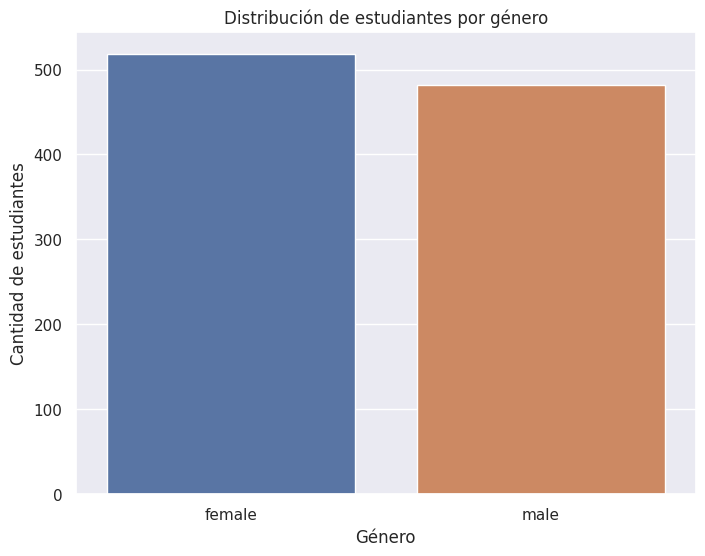

In [23]:
# Gráfico de barras para contar la cantidad de estudiantes por género

import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Distribución de estudiantes por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de estudiantes')
plt.show()

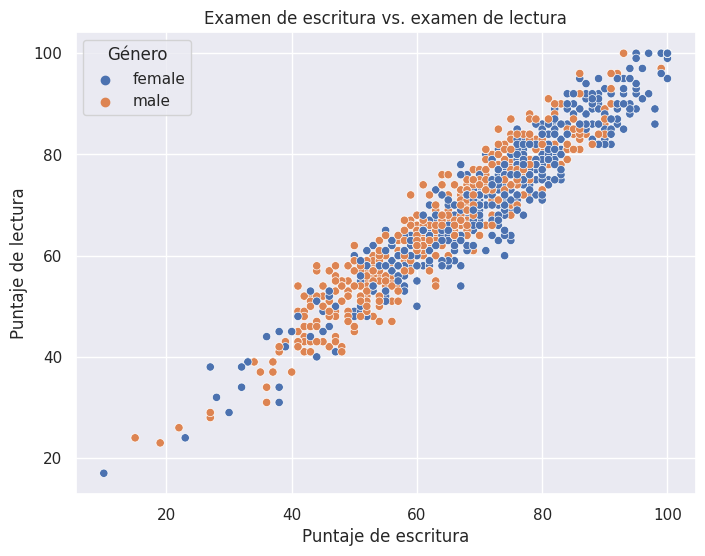

In [24]:
# Gráfico de dispersión para examen de lectura vs. examen de escritura
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='writing score', y='reading score', hue='gender')
plt.title('Examen de escritura vs. examen de lectura')
plt.xlabel('Puntaje de escritura')
plt.ylabel('Puntaje de lectura')
plt.legend(title='Género')
plt.show()

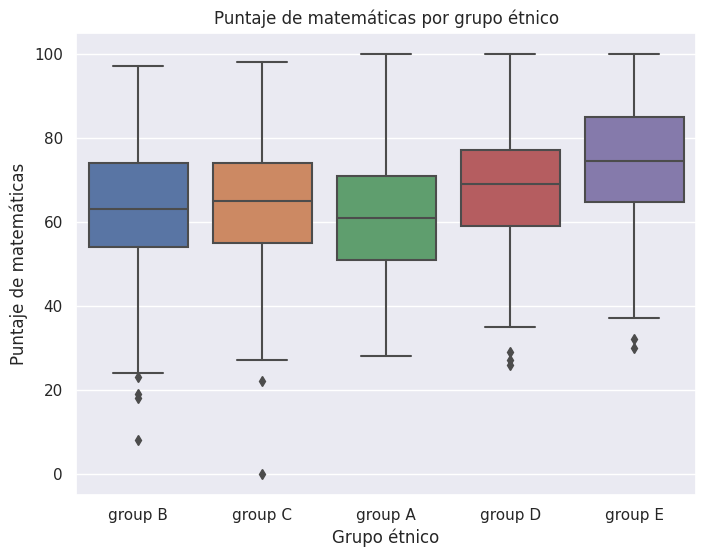

In [25]:
# Gráfico de cajas para comparar los puntajes de los diferentes grupos étnicos
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='race/ethnicity', y='math score')
plt.title('Puntaje de matemáticas por grupo étnico')
plt.xlabel('Grupo étnico')
plt.ylabel('Puntaje de matemáticas')
plt.show()

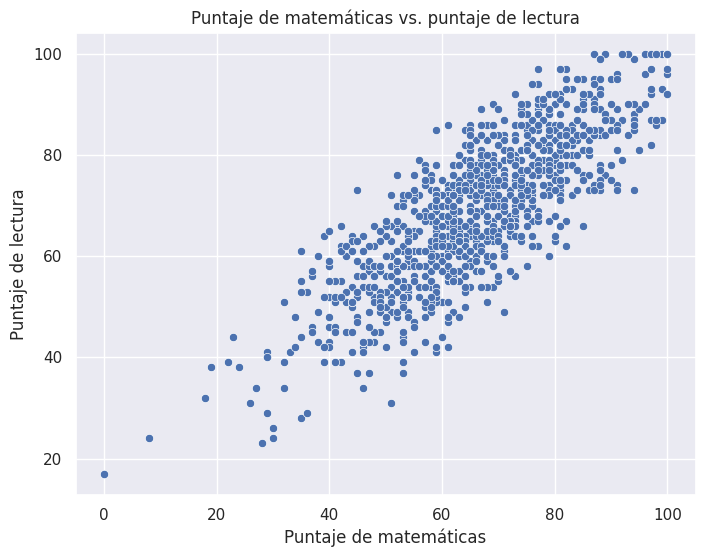

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [26]:
# Gráfico de dispersión y correlación entre puntajes de matemáticas y de lectura
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='math score', y='reading score')
plt.title('Puntaje de matemáticas vs. puntaje de lectura')
plt.xlabel('Puntaje de matemáticas')
plt.ylabel('Puntaje de lectura')
plt.show()

# Correlación entre puntajes de matemáticas, lectura y escritura
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
print(correlation_matrix)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Nota --> Puntuación F1: Es una medida combinada de la precisión y la exhaustividad, calculada como el promedio ponderado de ambas métricas. Proporciona una medida única del rendimiento del modelo.


In [28]:
# Seleccionar las características y el objetivo
features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score']
target = 'writing score'
X = df[features]
y = df[target]

# Codificar las variables categóricas
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear el modelo de Bosques Aleatorios
model = RandomForestClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo utilizando la precisión y el informe de clasificación
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Precisión: 0.06
Informe de clasificación:
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         2
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         4
          42       0.00      0.00      0.00         1
          43       0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

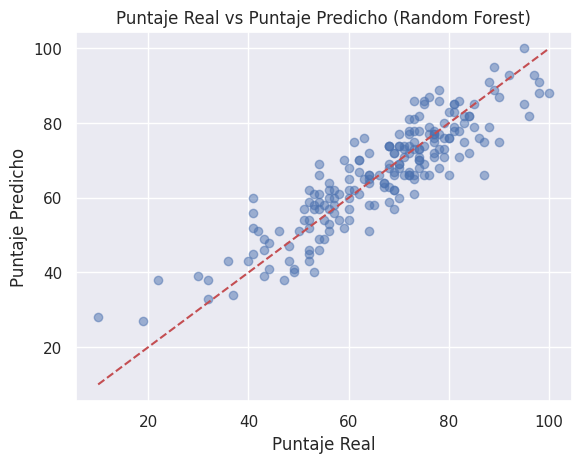

In [29]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax = plt.subplots()

# Graficar los puntajes reales vs los puntajes predichos
ax.scatter(y_test, y_pred, color='b', alpha=0.5)

# Agregar etiquetas y título
ax.set_xlabel('Puntaje Real')
ax.set_ylabel('Puntaje Predicho')
ax.set_title('Puntaje Real vs Puntaje Predicho (Random Forest)')

# Agregar una línea de referencia diagonal
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')

# Mostrar la figura
plt.show()


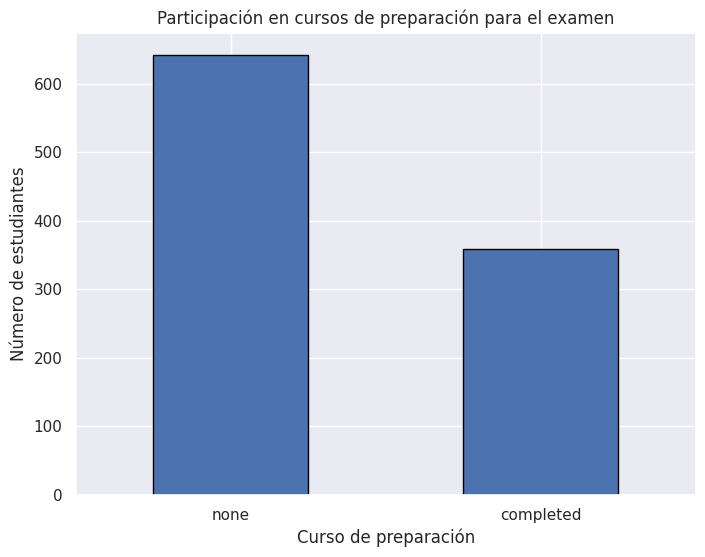

In [30]:
# Contar la cantidad de estudiantes con y sin curso de preparación para el examen
count_course = df['test preparation course'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
count_course.plot(kind='bar', edgecolor='black')
plt.title('Participación en cursos de preparación para el examen')
plt.xlabel('Curso de preparación')
plt.ylabel('Número de estudiantes')
plt.xticks(rotation=0)
plt.show()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Definir las características (X) y la variable objetivo (y)
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
y = df['math score']

# Codificar las variables categóricas como variables numéricas (si es necesario)
X = pd.get_dummies(X)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)


Error cuadrático medio (MSE): 206.31375


# Conclusiones:

1. Género: El dataset muestra una distribución casi equitativa entre estudiantes masculinos y femeninos. No se observa una diferencia clara en los puntajes entre géneros, pero se pueden realizar análisis adicionales para investigar posibles disparidades.


2. Relación entre variables: Existe una correlación positiva entre los puntajes de lectura y escritura, lo que sugiere que los estudiantes que obtienen buenos puntajes en una asignatura tienden a obtener buenos puntajes en la otra. La correlación entre los puntajes de matemáticas y los puntajes de lectura/escritura también es positiva, aunque en menor medida.

3. La mayoría de los estudiantes no han tomado un curso de preparación para el examen, ya que la cantidad de estudiantes sin curso de preparación es mayor que aquellos que lo han tomado.


4. El tipo de almuerzo que los estudiantes reciben también tiene un impacto en sus puntajes. Aquellos que tienen un almuerzo gratuito o reducido tienden a obtener puntajes más bajos en comparación con aquellos que tienen un almuerzo estándar.

